# Lab 2 Sample Code

In [4]:
import numpy as np
from numpy import dot
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    """ Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """ First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """ Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data = np.random.uniform(0, 1, (n, 2))

        inputs = []
        labels = []

        for point in data:
            inputs.append([point[0], point[1]])

            if point[0] > point[1]:
                labels.append(0)
            else:
                labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """ Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def fetch_data(mode, n):
        """ Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == 'Linear' or mode == 'XOR'

        data_gen_func = {
            'Linear': GenData._gen_linear,
            'XOR': GenData._gen_xor
        }[mode]

        return data_gen_func(n)

In [161]:
class SimpleNet:
    def __init__(self, num_step=2000, print_interval=100):
        """ A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval
        self.TRAIN = True

        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 10 nodes
        # Please initiate your network parameters here.
        self.w1 = np.random.uniform(0, 1, (2, 100))
        self.w2 = np.random.uniform(0, 1, (100, 10))
        self.w3 = np.random.uniform(0, 1, (10, 1))

        

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """ Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        print(data.shape, gt_y.shape, pred_y.shape[0])
        assert data.shape[0] == gt_y.shape[0]
        assert data.shape[0] == pred_y.shape[0]

        plt.figure()

        plt.subplot(1, 2, 1)
        plt.title('Ground Truth', fontsize=18)

        for idx in range(data.shape[0]):
            if gt_y[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.subplot(1, 2, 2)
        plt.title('Prediction', fontsize=18)

        for idx in range(data.shape[0]):
            if pred_y[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.show()
        
    def train(self):
        self.TRAIN = True
        
    def evaluate(self):
        self.TRAIN = False

    def forward(self, inputs):
        """ Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """

        """ FILL IN HERE """

        self.l1_out = sigmoid(dot(inputs, self.w1))
        self.l2_out = sigmoid(dot(self.l1_out, self.w2))
        self.l3_out = sigmoid(dot(self.l2_out, self.w3))
        return self.l3_out

    def backward(self, error):
        """ Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        learning_rate = 1e-1

        """ FILL IN HERE """

        self.w3 -= dot(error.transpose(), der_sigmoid(self.l3_out)) * learning_rate
        self.w2 -= dot(error.transpose(), der_sigmoid(self.l2_out)) * learning_rate
        self.w1 -= dot(error.transpose(), der_sigmoid(self.l1_out)) * learning_rate
            


    def train(self, inputs, labels):
        """ The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                self.output = self.forward(inputs[idx:idx+1, :])
                self.error = self.output - labels[idx:idx+1, :]
                """ apply your backward function: """
                """ FILL IN HERE """
                self.backward(self.error)

            if epochs % self.print_interval == 0:
                print('Epochs {}: '.format(epochs))
                self.test(inputs, labels)

        print('Training finished')
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """ The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx:idx+1, :])
            error += abs(result - labels[idx:idx+1, :])

        error /= n


        """ Print or plot your results in your preferred forms"""
        print('accuracy: %.2f' % ((1 - error)*100) + '%')
        
        """ FILL IN HERE """
        # print('')

### Run "Linear"

Epochs 0: 
accuracy: 47.22%
Epochs 10: 
accuracy: 50.27%
Epochs 20: 
accuracy: 50.27%
Epochs 30: 
accuracy: 50.27%
Epochs 40: 
accuracy: 50.27%
Epochs 50: 
accuracy: 50.27%
Epochs 60: 
accuracy: 50.27%
Epochs 70: 
accuracy: 50.27%
Epochs 80: 
accuracy: 50.27%
Epochs 90: 
accuracy: 50.27%
Training finished
accuracy: 50.27%
(100, 2) (100, 1) 100


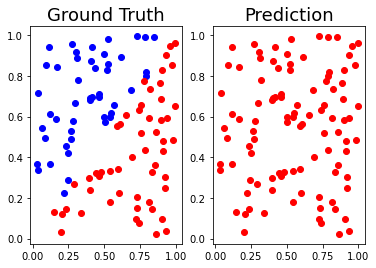

' FILL IN HERE '

In [162]:
""" Customize your own code if needed """

data, label = GenData.fetch_data('Linear', 100)

net = SimpleNet(100, 10)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

""" FILL IN HERE """

### Run "XOR"

In [ ]:
""" Customize your own code if needed """

data, label = GenData.fetch_data('XOR', 100)

net = SimpleNet(100, num_step=100)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result.T)

""" FILL IN HERE """

In [95]:
data, label = GenData.fetch_data('Linear', 100)

In [75]:
print(data[0][1])
d = data[0:1, :]
w1 = np.random.uniform(0, 1, (d.shape[1], 8))
w2 = np.random.uniform(0, 1, (w1.shape[1], 8))
w3 = np.random.uniform(0, 1, (w2.shape[1], 1))

print(sigmoid(dot(d, w1)))
print(sigmoid(dot(sigmoid(dot(d, w1)), w2)))
print(sigmoid(dot(sigmoid(dot(sigmoid(dot(d, w1)), w2)), w3)))
print(d.shape)

4.859273060080913e-01
[[0.6184718  0.75624752 0.62158052 0.71513912 0.61094739 0.68402495
  0.53224593 0.6406115 ]]
[[0.90704935 0.90688758 0.92456266 0.93066555 0.94664702 0.92553423
  0.93317997 0.90788347]]
[[0.98147076]]
(1, 2)


In [7]:
print(sigmoid(-0.0382))

4.9045116114239506e-01


In [136]:
net = SimpleNet(100, 10)

In [151]:
# a = net.forward(data[0:2, :])
# print(a, '\n')
# print(net.w1, '\n')
# err = a - label[0:2, :]
# print(err, '\n')
# net.backward(err)
# print(net.w1)
# net.test(data[15:50, :], label[15:50, :])
# b = net.forward(data[15:50, :])
# print(b)
# print(label[15:50, :])
# net.train(data, label)
# print(net.w1)
der_sigmoid(2.5)

-3.75

In [106]:
print(err)

[[0.99743368]
 [0.99743368]]


In [103]:
net = SimpleNet(100, 10)
net.train(data[0:2, :], label[0:2, :])

Epochs 0: 
accuracy: 0.00%
Epochs 10: 
accuracy: 0.00%
Epochs 20: 
accuracy: 0.00%
Epochs 30: 
accuracy: 0.00%
Epochs 40: 
accuracy: 0.00%
Epochs 50: 
accuracy: 0.00%
Epochs 60: 
accuracy: 0.00%
Epochs 70: 
accuracy: 0.00%
Epochs 80: 
accuracy: 0.00%
Epochs 90: 
accuracy: 0.00%
Training finished
accuracy: 0.00%


/tmp/ipykernel_288519/167886730.py:12: RuntimeWarning: overflow encountered in multiply
  return y * (1 - y)


In [98]:
print(net.l1_out.shape)

(2, 100)
